# Covariates - Total Supply

In [1]:
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

from utils import get_filtered_data, create_future_dataframe, plot_series

In [2]:
#Reading the data
df = get_filtered_data()

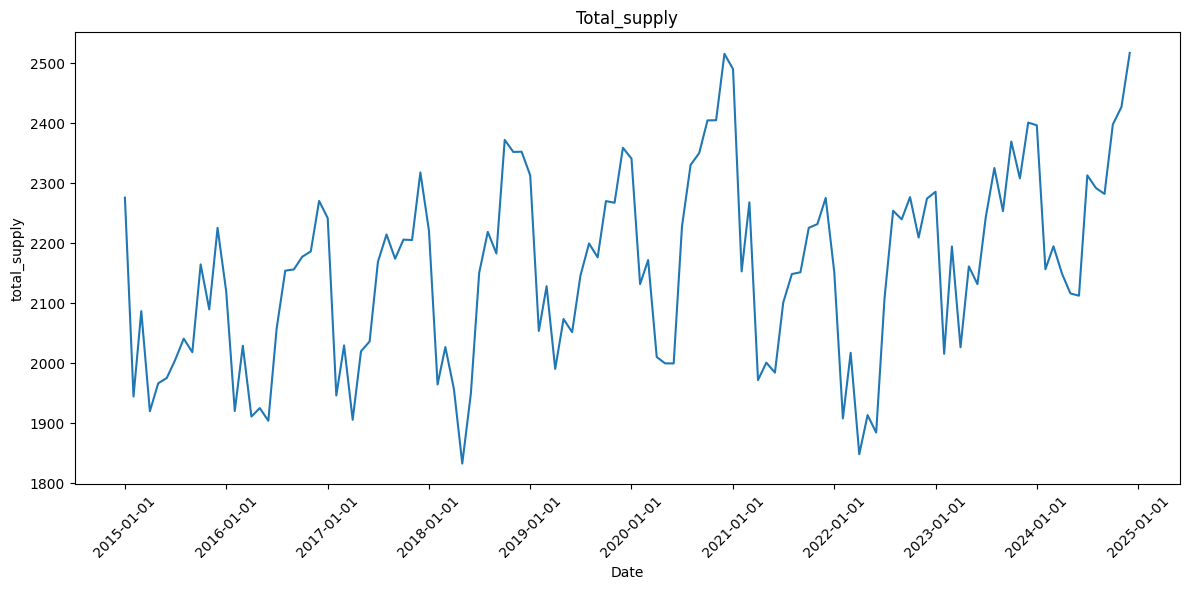

In [3]:
total_supply = df[['date', 'total_supply']] 
plot_series(total_supply, 'total_supply')

## Basic Linear Regression Model

In [4]:
total_supply = (
    total_supply
    .assign(
        t = range(len(total_supply)),
        month = total_supply["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_total_supply = smf.ols("total_supply ~ t + C(month)", data=total_supply).fit()

In [5]:
model_total_supply.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_supply   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     32.93
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.76e-30
Time:                        18:40:52   Log-Likelihood:                -682.80
No. Observations:                 120   AIC:                             1392.
Df Residuals:                     107   BIC:                             1428.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2198.8398     26.315     83.560      0.000    2146.674    2251.005
C(month)[T.2]   -265.5710     33.908     -7.832      0.000    -332.790    -198.352
C(month)[T.3]   -171.9023     33.910     -5.069      0.000    -239.125    -104.679
C(month)[T.4]   -319.1382     33.913     -9.410      0.000    -386.367    -251.909
C(month)[T.5]   -288.7204     33.917     -8.512      0.000    -355.957    -221.483
C(month)[T.6]   -288.3505     33.923     -8.500      0.000    -355.598    -221.103
C(month)[T.7]   -140.7276     33.929     -4.148      0.000    -207.988     -73.467
C(month)[T.8]    -76.7157     33.937     -2.261      0.026    -143.992      -9.440
C(month)[T.9]    -97.6123     33.946     -2.876      0.005    -164.906     -30.319
C(month)[T.10]   -11.2663     33.956     -0.332      0.741     -78.580      56.047
C(month)[T.11]   -31.1085     33.967     -0.916      0.362     -98.444      36.227
C(month)[T.12]    49.9816     33.980      1.471      0.144     -17.379     117.342
t                  1.5697      0.201      7.817      0.000       1.172       1.968
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.850
Skew:                          -0.206   Prob(JB):                        0.654
Kurtosis:                       2.986   Cond. No.                         857.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualizing the Model Fit on Training Data

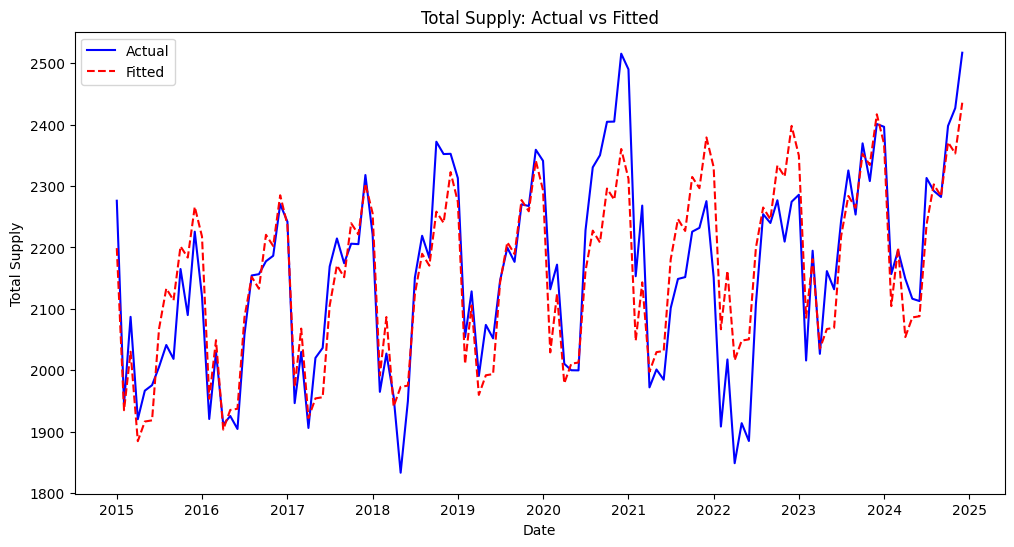

In [6]:
total_supply['fitted'] = model_total_supply.fittedvalues

# Plot actual vs fitted
plt.figure(figsize=(12, 6))
plt.plot(total_supply["date"], total_supply["total_supply"], label="Actual", color="blue")
plt.plot(total_supply["date"], total_supply["fitted"], label="Fitted", color="red", linestyle="--")

plt.title("Total Supply: Actual vs Fitted")
plt.xlabel("Date")
plt.ylabel("Total Supply")
plt.legend()
plt.show()

### Visualing the Predictions on Test Data

In [7]:
test_df = create_future_dataframe() 

test_df['total_supply'] = model_total_supply.predict(test_df) 

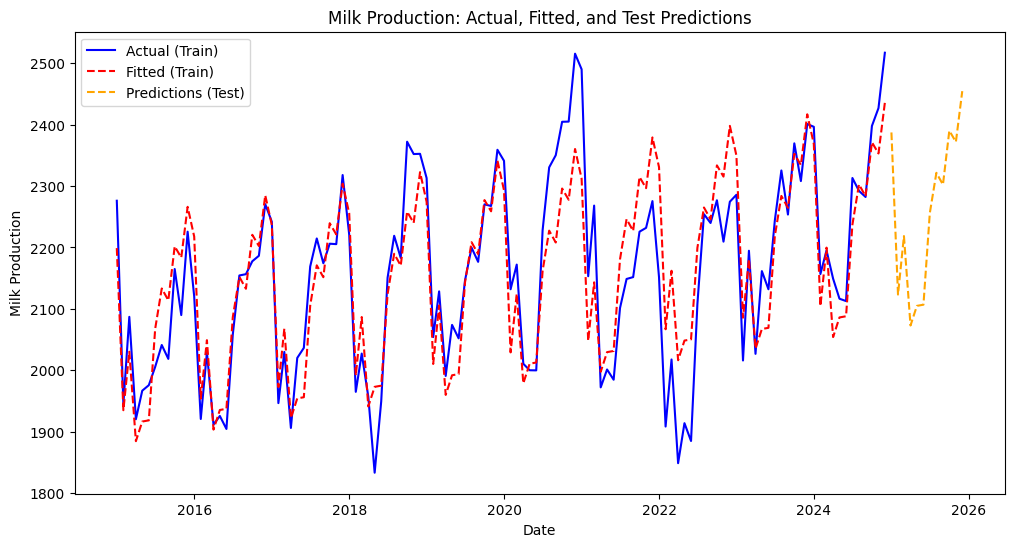

In [8]:
# Plot
plt.figure(figsize=(12, 6))

# Actual (train only)
plt.plot(total_supply["date"], total_supply["total_supply"],
         label="Actual (Train)", color="blue") 

# Fitted (train only)
plt.plot(total_supply["date"], total_supply["fitted"],
         label="Fitted (Train)", color="red", linestyle="--")

# Predictions (test only)
plt.plot(test_df["date"], test_df["total_supply"],
         label="Predictions (Test)", color="orange", linestyle="--")

plt.title("Milk Production: Actual, Fitted, and Test Predictions")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

## Saving the Total Supply Predictions

In [9]:
test_df[['date', 'total_supply']].to_csv("../../predictions/2025_total_supply.csv", index=False)